In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 15:36:03,684] A new study created in memory with name: no-name-fff44e00-2ff1-49ec-bf49-ced93e860093
[I 2025-04-27 15:36:56,588] Trial 0 finished with value: 0.9684210526315787 and parameters: {'n_estimators': 6198, 'max_depth': 12, 'learning_rate': 0.0029948970248396636, 'subsample': 0.6231913923015483, 'colsample_bytree': 0.6703880955141942, 'gamma': 3.150561041777833, 'reg_alpha': 0.02970283682884859, 'reg_lambda': 1.2174494983716648e-08}. Best is trial 0 with value: 0.9684210526315787.
[I 2025-04-27 15:37:07,839] Trial 1 finished with value: 0.9710526315789473 and parameters: {'n_estimators': 1592, 'max_depth': 12, 'learning_rate': 0.042042034991090736, 'subsample': 0.5514498289387461, 'colsample_bytree': 0.5297409551681126, 'gamma': 3.2256934422160892, 'reg_alpha': 1.2817270640370396e-07, 'reg_lambda': 4.9006708937636015e-08}. Best is trial 1 with value: 0.9710526315789473.
[I 2025-04-27 15:37:48,934] Trial 2 finished with value: 0.9605263157894737 and parameters: {'n

Best trial:
Accuracy: 0.9763157894736842
Best hyperparameters:  {'n_estimators': 1570, 'max_depth': 13, 'learning_rate': 0.06565899027516363, 'subsample': 0.6842864521514027, 'colsample_bytree': 0.5684583806574719, 'gamma': 1.839841609815135, 'reg_alpha': 0.0008550185009489427, 'reg_lambda': 0.0034107978185275076}


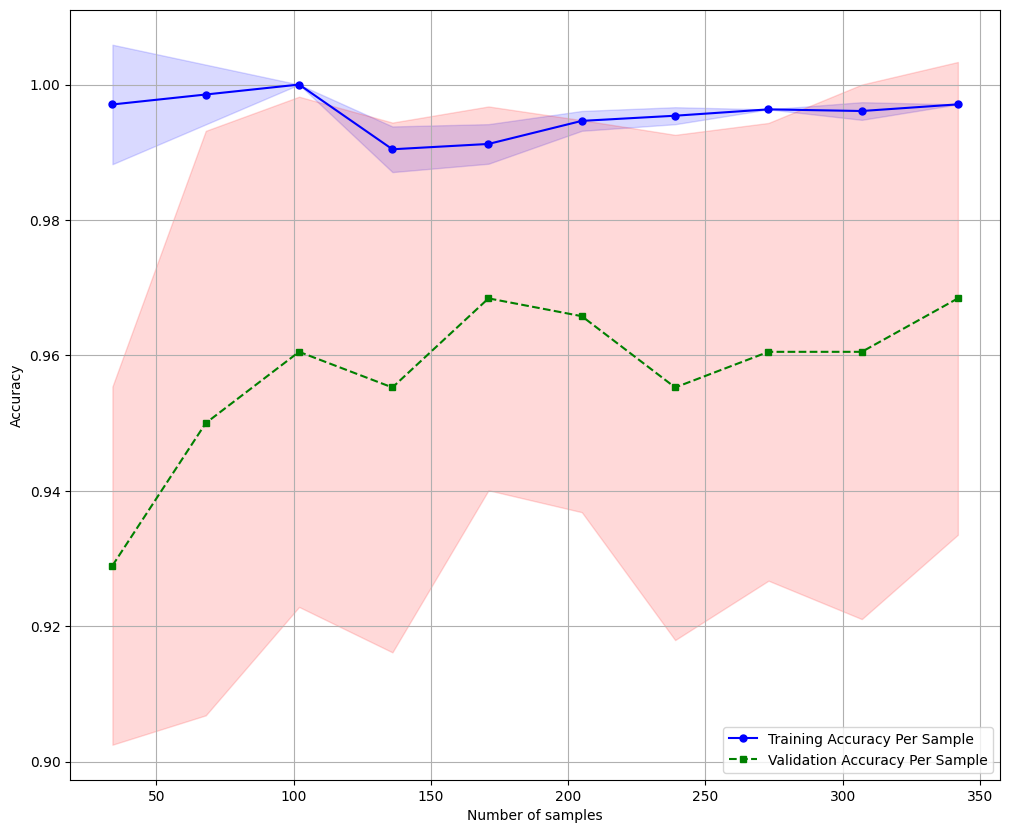

Confusion Matrix
[[ 56   8]
 [  0 107]]
Accuracy: 0.9532, Precision: 0.9304, Recall: 1.0000, F1: 0.9640, AUC: 0.9968


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

helper.train_and_evaluate_model('xgb', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)